# Notebook destinado a Parte 2 - Experimentação do Projeto 2 de Redes Neurais 2020.1
## Colaboradores: Jakson Protázio e Nadine Brito

Primeiro importamos as bibliotecas necessárias.

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt

Em seguida realizamos a leitura do dataset. 

In [24]:
dataset=np.fromfile('data/data3.txt')
linhas = len(dataset)//3
colunas=3
dataset=dataset.reshape(linhas, colunas)
print(dataset)

[[ 0.06162809 -0.1242566   0.        ]
 [-0.12576683 -0.20385724  0.        ]
 [ 0.03625188 -0.12610779  0.        ]
 ...
 [ 1.03004673  1.06580527  1.        ]
 [ 0.95844465  1.05425162  1.        ]
 [ 1.05935906  0.93900834  1.        ]]


Preparamos as configurações que serão utilizadas para esta etapa do trabalho

In [25]:
n_array = [0.4,0.1,0.01]
i_array = [-100.0,100.0,-1.0,1.0,-0.5,0.5]

n_config = []
ini_config = [] 
fim_config = []

for i in range(0,3):
    for j in range (0,6,2):
        n_config.append(n_array[i])
        ini_config.append(i_array[j])
        fim_config.append(i_array[j+1])

Vamos preencher um vetor com as entradas do dataset.

In [26]:
entradas = np.array([[-1, dataset[0,0], dataset[0,1]]])
for i in range(1, linhas):
    entradas = np.append(entradas, [[-1, dataset[i,0], dataset[i,1]]], axis=0)
print(entradas)

[[-1.          0.06162809 -0.1242566 ]
 [-1.         -0.12576683 -0.20385724]
 [-1.          0.03625188 -0.12610779]
 ...
 [-1.          1.03004673  1.06580527]
 [-1.          0.95844465  1.05425162]
 [-1.          1.05935906  0.93900834]]


Definimos uma função para o prennchimento do vetor de pesos inicial.

In [27]:
def iniciar_pesos(inicio,fim):
    pesos = np.array([])
    pesos = np.array([random.uniform(inicio,fim),random.uniform(inicio,fim),random.uniform(inicio,fim)])
    return pesos

Agora verificamos, através de uma soma ponderada e uma função de ativação, se os pesos precisam de ajuste. Para isso, definimos a função que irá realizar a soma ponderada.

In [28]:
def soma(entradas,pesos):
    return(np.dot(entradas,pesos))

Em seguida definimos a função de ativação. Nesse cenário, a pedido do enunciado, adotou-se a função de ativação degrau com limiar sendo 0.

In [29]:
def ativacao(saida):
    if(saida >= 0):
        return 1
    else:
        return 0  

Definimos também a função de ajuste de pesos.

In [30]:
def ajusta(pesos_atuais, yd, y, x,taxa):
    erro = (yd-y)
    mult = taxa*erro
    result = pesos_atuais + np.dot(mult,x)
    return result


A função verifica, será responsável por fazer a chamada das funções para realizar a soma ponderada, função de ativação e a função de ajuste de pesos.

In [31]:
def verifica(pesos,taxa):
    qtde_ajuste = 0
    n = len(entradas)
    
    for i in range(n):
        soma_saida = soma(entradas[i], pesos)
        y = ativacao(soma_saida)
        if(y != dataset[i,2]):
            pesos = ajusta(pesos,dataset[i,2],y,entradas[i],taxa)
            qtde_ajuste += 1
    
    return pesos,qtde_ajuste

A função abaixo éreponsável por gerar o gráfico que separa as classes para cada configuração.

In [32]:
def plotar_grafico(pesos,n,inicio,fim,num):
    resultado_0x = np.array([])
    resultado_0y = np.array([])
    resultado_1x = np.array([])
    resultado_1y = np.array([])

    for i in range (len(dataset)):
        if(dataset[i,2] == 0):
            resultado_0x = np.append(resultado_0x,[dataset[i,0]])
            resultado_0y = np.append(resultado_0y,[dataset[i,1]])
        else:
            resultado_1x = np.append(resultado_1x,[dataset[i,0]])
            resultado_1y = np.append(resultado_1y, [dataset[i,1]])

    plt.scatter(resultado_1x,resultado_1y, color='blue')
    plt.plot()

    plt.scatter(resultado_0x,resultado_0y, color='red')
    plt.plot()

    x2 = (pesos[0]/pesos[2])
    x1 = (pesos[0]/pesos[2])/(pesos[1]/pesos[2]) 
    
    title = 'Configuração '+str(num)+': taxa de aprendizagem (n) = '+str(n)+' e intervalo de pesos iniciais entre '+str(inicio)+' e '+str(fim)
    plt.axline([x1,0],[0,x2],color='green')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.show()

Para dar início ao aprendizado colocamos a chamada da função verifica() em loop, onde a condição de parada é a convergência, ou seja, quando não há mais erros para os exemplos no conjunto de treinamento. Para isso iremos realizar um total de 9 configuração. Cada configuração irá ser iterada 100 vezes.

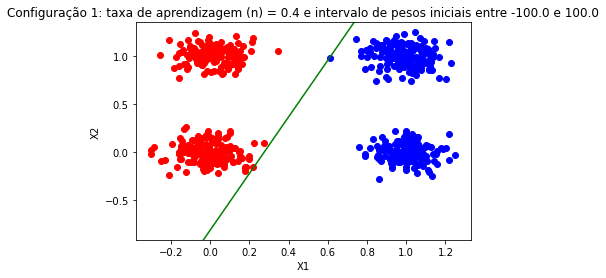

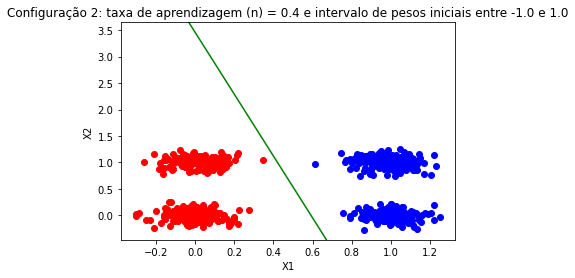

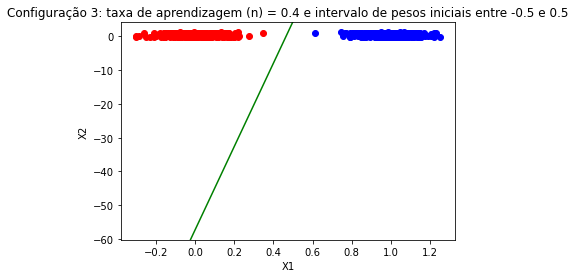

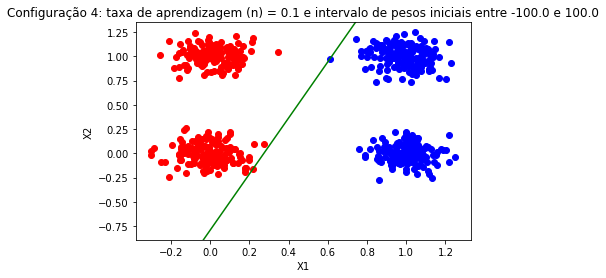

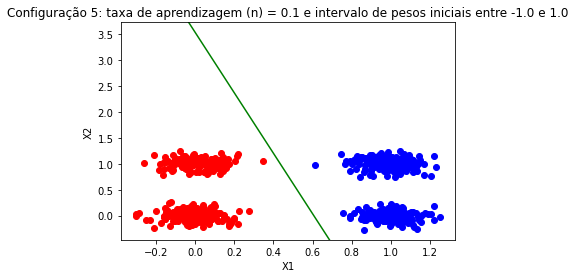

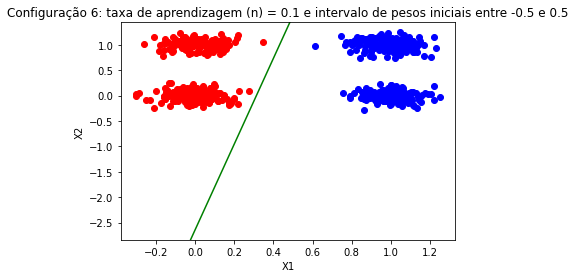

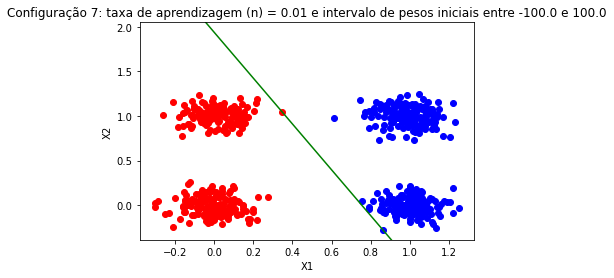

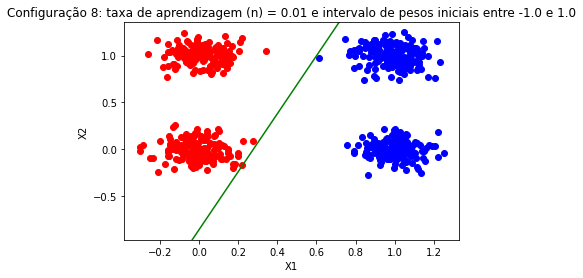

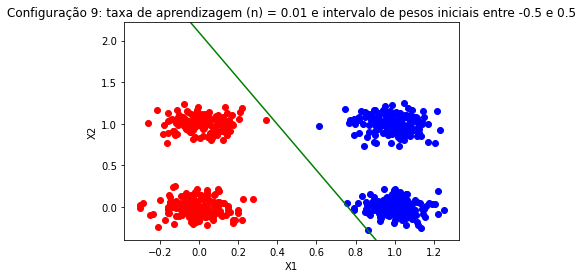

In [33]:
grafico_media_ajustes = []
grafico_desvio_padrao_ajustes = []
grafico_media_epocas = []
grafico_desvio_padrao_epocas = []

for i in range(0,len(n_config)):
    qtde_epocas_config = np.array([])
    iteracoes_ajustes = np.array([])
    for j in range(0,100):
        pesos = np.array([])
        pesos = iniciar_pesos(ini_config[i],fim_config[i])
        ajustes = np.array([])

        parar = False
        epocas = 0

        while(parar==False):
            resultado = verifica(pesos,n_config[i])
            pesos = resultado[0]
            ajustes = np.append(ajustes,[resultado[1]])
            indice = len(ajustes)
            if(ajustes[indice-1] == 0):
                parar = True
            epocas += 1
        ajustes = ajustes.astype(int)
        total_ajustes = np.sum(ajustes)
        iteracoes_ajustes = np.append(iteracoes_ajustes,[[total_ajustes]])
        qtde_epocas_config = np.append(qtde_epocas_config,[[epocas]])
    grafico_media_ajustes.append(np.mean(iteracoes_ajustes))
    grafico_desvio_padrao_ajustes.append(np.std(iteracoes_ajustes))
    grafico_media_epocas.append(np.mean(qtde_epocas_config))
    grafico_desvio_padrao_epocas.append(np.std(qtde_epocas_config))
    
    plotar_grafico(pesos,n_config[i],ini_config[i],fim_config[i],i+1)

Ao finalizar a execução do algoritmo, o qual contemplou as 9 configurações, levando em conta que cada configuração foi executada 100 vezes, podemos visualizar os gráficos gerados para cada configuração, onde representam os grupos de dados, representados em azul, que obtiveram sucesso em ativar o neurônio. 

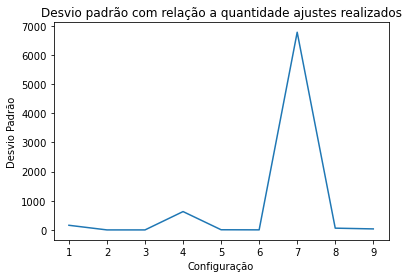

In [37]:
plt.xlabel('Configuração')
plt.ylabel('Desvio Padrão')
plt.title('Desvio padrão com relação a quantidade ajustes realizados')
plt.plot([1,2,3,4,5,6,7,8,9],grafico_desvio_padrao_ajustes)
plt.show()

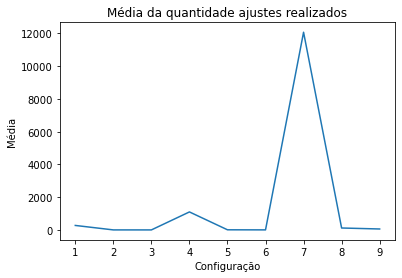

In [38]:
plt.xlabel('Configuração')
plt.ylabel('Média')
plt.title('Média da quantidade ajustes realizados')
plt.plot([1,2,3,4,5,6,7,8,9],grafico_media_ajustes)
plt.show()

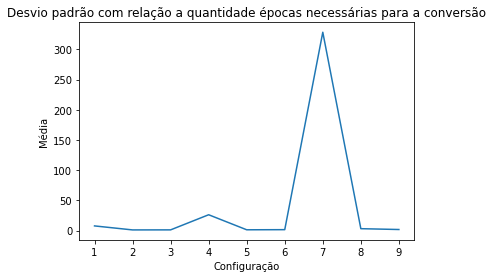

In [39]:
plt.xlabel('Configuração')
plt.ylabel('Desvio Padrão')
plt.title('Desvio padrão com relação a quantidade de épocas necessárias para a conversão')
plt.plot([1,2,3,4,5,6,7,8,9],grafico_desvio_padrao_epocas)
plt.show()

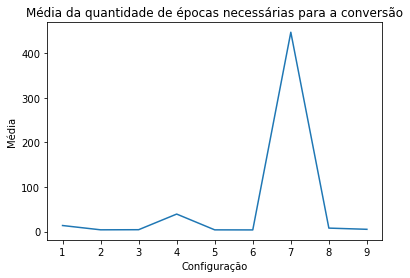

In [42]:
plt.xlabel('Configuração')
plt.ylabel('Média')
plt.title('Média da quantidade de épocas necessárias para a conversão')
plt.plot([1,2,3,4,5,6,7,8,9],grafico_media_epocas)
plt.show()

Os gráficos acima mostram o desvio padrão dos ajustes realizados nos pesos em cada configuração, assim como a média desses ajustes. Também foi gerado o gráfico de desvio padrão e média para as épocas necessárias para a convergência em cada configuração.

Ao visualizar os gráfico, pode-se observar que são semelhantes tanto nos desvios padrões quanto nas médias apresentadas por cada configuração. Também é possível notar que a configuração 7 apresenta o maior desvio padrão e média, tanto em ajustes de pesos quanto em épocas necessárias para a conversão. O que pode inferir que a configração 7 não seja a melhor para o treinamento da rede.